<a href="https://colab.research.google.com/github/ACoronaGuzman/Metodos/blob/main/Aplicaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from math import *
import numpy as np
import matplotlib . pyplot as plt
from scipy.interpolate import CubicSpline
import pandas as pd

1. Durante una ronda de inspección por una reserva, dos guardabosques descubrieron
el cadáver de un jabalí. Un examen preliminar permitió concluir que el animal falleció
instantáneamente a causa de un balazo de una cazador furtivo. sospechando que el cazador debía regresar a recoger su presa, los guardas decidieron esperarlo escon-
didos no lejos del lugar del crimen. Al poco tiempo aparecieron dos sujetos y se diri-
gieron sin rodeos al jabalí. Al ser detenidos los desconocidos negaron rotundamente su participación en el delito. Aunque los guardabosques tenían pruebas indirectas
de su culpabilidad, para obtener una prueba fehaciente era necesario determinar el
instante exacto en que el jabalí fue muerto.
Conforme a la ley de radiación de calor la velocidad de enfriamiento de un cuerpo en
el medio ambiente es proporcionar a la diferencia. Entre la temperatura del cuerpo y
la temperatura del medio
$$( \frac{dy}{dx} ) = k(x − a)$$
Donde x es la temperatura del cuerpo en el instante t, a es la temperatura del medio ambiente y k es un factor positivo de proporcionalidad, x0 es la temperatura del cuerpo en el instante t = 0.

(a) Si en el instante en que fueron detenidos los sospechosos la temperatura x del
cuerpo del jabalí era igual a 31°C y pasada una hora era igual a 29°C, entonces,
considerando que en el instante del disparo x = 37°C y a = 21°C, y tomando el
instante del arresto como t = 0, determinar el momento del disparo.

Resolvemos la ecuacion diferencial. Tomando a $a$ como constante tenemos que:
$x0=31,x1=29,xt=37,a=21,$
Queremos saber cuanto vale t, entonces por variables separables:
$$( \frac{dx}{dt} ) = k(x − a)  ⇒ \frac{dx}{x-a} = kdt ⇒ \int\frac{dx}{x-a} = \int kdt ⇒ ln(x-a) = kt + c ⇒ e^{ln(x-a)} = e^{kt + c} ⇒ x-a = ce^{kt}$$
Sustituyendo, cuando t=0:
$$31-21=ce^0 ⇒ c=10$$
Sustituyendo, cuando t=1 con c=10:
$$ 29-21=10e^k ⇒ k=ln(\frac{4}{5}) ⇒ k= -0.223144$$
Ahora sustituyendo para encontrar t:
$$37-21=10e^{-0.223144t} ⇒ t= \frac{ln(\frac{8}{5})}{-0.223144}⇒t=-2.10628$$
Por lo tanto, el momento del diparo fue dos horas antes de ser detenidos.

(b) En el caso cuando la temperatura del aire varía con el tiempo, la ley de enfria-
miento del cuerpo se convierte en la ecuación diferencial lineal no homogénea.

$$\frac{dx}{dt} = kx − ka(t)$$

Donde $a(t)$ es la temperatura del aire en el instante t. Hagamos algunas conjeturas:
en el instante de la detención de los sospechosos la temperatura del cuerpo
del jabalí era igual a 30°C; el día del acontecimiento la temperatura del aire descendió cada hora después del medio día en 1°C y era igual a 0°C en el instante del hallazgo del cadáver; finalmente, pongamos que al cabo de una hora de ser detectado el animal, su temperatura bajó hasta 25°C.
Tomando t = 0 como en el instante del disparo, asumiendo que entonces la temperatura corporal del jabalí era x0 = 37°C y denotando con $t∗$el instante en que los guardabosques descubrieron el cadáver, obtenemos $a(t)=t∗ − t$. Hallar de nuevo el momento en que murió el jabalí.


Resolvemos la ecuacion diferencial. Tomando a  $a$ como funcion, tenemos que:  $xt=30 y a(t)=0 ⇒ t*=t, x1=25, x0=37, $  Queremos saber cuanto vale t, entonces por factor integrante:
$$(\frac{dx}{dt})=kx−ka(t)⇒(\frac{dx}{dt})=kx−k(t*-t)⇒x=(37-t*-\frac{1}{k})e^{-kt}+t*-t+\frac{1}{k} $$
Sustituyendo, obtenemos las ecuaciones:
$$(37-t*-\frac{1}{k})e^{-kt*}+\frac{1}{k}=30$$
$$(37-t*-\frac{1}{k})e^{-k(t*+1)}+\frac{1}{k}=26$$
Ahora quereos encontrar a k, on ayuda del método de aproximaciones sucesivas de Newton.
$$(1)...P(k)=30k-1+(1-26k)e^k=0$$
$$(2)...P(k)=(37k-1+kt)e^{kt}-30k+1=0$$

In [80]:
#resolvemos para 1
po = 0.5
tol = 0.0000001
n = 10
def f1(x):
  f = 30*x - 1 +(1-26*x)*(np.exp(x))
  return (f)

def f2(x):
  h = 30 - (25 + 26*x)*(np.exp(x))
  return (h)

def f3(x):
  g = -(51+26*x)*(np.exp(x))
  return (g)
print("Caso 1")
print("i \t pn \t\t f(pn) \t\t f'(pn) \t f''(pn)")
print("0 \t {1:6.6f} \t {2:6.6f} \t {3:6.6f} \t {4:6.6f}".format(0,po,f1(po),f2(po),f3(po)))
i = 1
while i<=n:
  p = po - f1(po)/f2(po)

  if abs(p-po) < tol:
    break

  po = p
  print("{0} \t {1:6.6f} \t {2:6.6f} \t {3:6.6f} \t {4:6.6f}".format(i,po,f1(po),f2(po),f3(po)))
  i = i+1

#resolvemos para 2
to = -1
tol = 0.000000001
n = 10
def g1(x):
  k=0.178952
  j = (37*k-1+k*x)*(np.exp(k*x))-30*k + 1
  return (j)

def g2(x):
  k=0.178952
  m = (37*(k**2) + (k**2)*x)*(np.exp(k*x))
  return (m)

def g3(x):
  k=0.178952
  r = (37*(k**3) + k**2 + (k**3)*k)*(np.exp(k*x))
  return (r)
print("Caso 2")
print("i \t pn \t\t f(pn) \t\t f'(pn) \t f''(pn)")
print("0 \t {1:6.6f} \t {2:6.6f} \t {3:6.6f} \t {4:6.6f}".format(0,to,g1(to),g2(to),g3(to)))
i = 1
while i<=n:
  t = to - g1(to)/g2(to)

  if abs(t-to) < tol:
    break

  to = t
  print("{0} \t {1:6.7f} \t {2:6.7f} \t {3:6.7f} \t {4:6.7f}".format(i,to,g1(to),g2(to),g3(to)))
  i = i+1

Caso 1
i 	 pn 		 f(pn) 		 f'(pn) 	 f''(pn)
0 	 0.500000 	 -5.784655 	 -32.651408 	 -105.518161
1 	 0.322836 	 -1.525956 	 -16.118044 	 -82.025052
2 	 0.228162 	 -0.351425 	 -8.859806 	 -71.523322
3 	 0.188497 	 -0.055195 	 -6.103384 	 -67.496659
4 	 0.179454 	 -0.002748 	 -5.497020 	 -66.607676
5 	 0.178954 	 -0.000008 	 -5.463736 	 -66.558845
6 	 0.178952 	 -0.000000 	 -5.463635 	 -66.558696
Caso 2
i 	 pn 		 f(pn) 		 f'(pn) 	 f''(pn)
0 	 -1.000000 	 0.181974 	 0.963957 	 0.204928
1 	 -1.1887782 	 0.0035059 	 0.9270495 	 0.1981206
2 	 -1.1925601 	 0.0000014 	 0.9263245 	 0.1979865
3 	 -1.1925615 	 0.0000000 	 0.9263242 	 0.1979865


Por lo tanto, el momento en que murio el jabali fua aproximadamente una hora atras.

2. Considere la Tabla 1, que muestra los datos de una epidemia de influenza en un colegio inglés.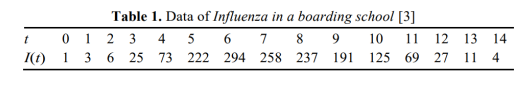

(a) Trace la gráfica de estos datos.

(b) Use su splines cúbicos para trazar una curva suave sobre los mismos datos.

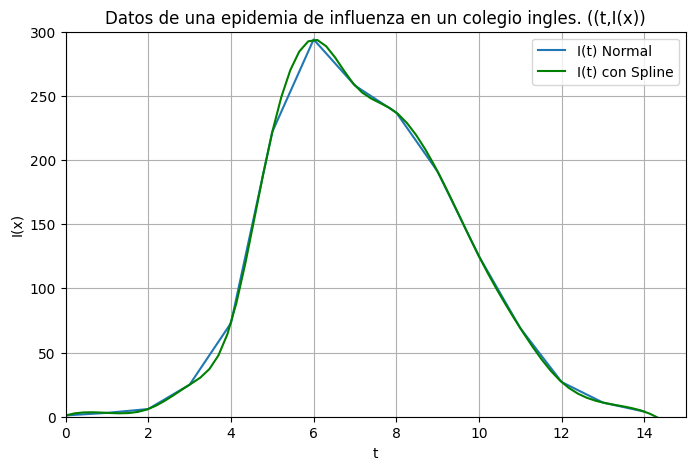

In [53]:
#utilizando funcion CubicSpline
x =np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
y =np.array([1,3,6,25,73,222,294,258,237,191,125,69,27,11,4])
S= CubicSpline(x, y)
x_new = np.linspace(0, 15, 70)
f_new = S(x_new)
plt.figure(figsize = (8,5))
plt.plot(x,y,label='I(t) Normal')
plt.plot(x_new, f_new, 'g',label='I(t) con Spline')
plt.xlabel('t'); plt.ylabel('I(x)');
plt.title("Datos de una epidemia de influenza en un colegio ingles. ((t,I(x))")
plt.xlim([0,15]),plt.ylim([0,300]),plt.grid(),plt.legend()
c

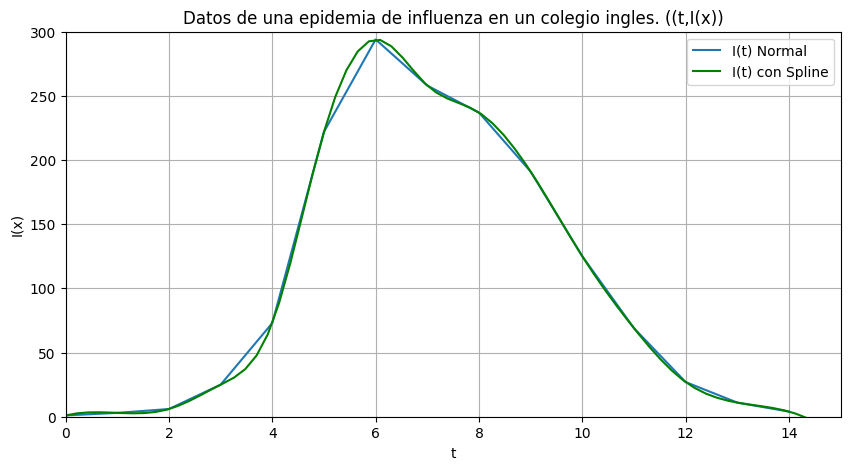

In [78]:
##utilizando codigo
x =np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
y =np.array([1,3,6,25,73,222,294,258,237,191,125,69,27,11,4])
x_new = np.linspace(0, 15, 70)
ni=(x.size)
n=ni-1
A= np.zeros (ni)
a=np.zeros(n)
A[:]= y
h=np.zeros(n)
for i in range(0,n):
  h[i]=x[i+1]-x[i]
for j in range(0,n):
  a[j]=(3*(A[j+1]-A[j]))/h[j]-(3*(A[j]-A[j-1]))/h[j-1]
#pera determinar a c
l=np.zeros(n)
mu=np.zeros(n)
z=np.zeros(n)
l[0]=1
for k in range(1,n-1):
  l[k]=2*(x[k+1]-x[k-1])-h[k-1]*mu[k-1]
  mu[k]=h[k]/l[k]
  z[k]=(a[k]-h[k-1]*z[k-1])/l[k]
l[n-1]=1
#elementos necesarios
#S= CubicSpline(x, y)
c=np.zeros(ni)
b=np.zeros(n)
d=np.zeros(n)
t=n-1
while t>=0:
  c[t]=z[t]-mu[t]*c[t-1]
  b[t]=(A[t+1]-A[t])/h[t]-(h[t]*(c[t+1]+2*c[t]))/3
  d[t]=(c[t+1]-c[t])/(3*h[t])
  t-=1
f_new=np.zeros(len(x_new))
for j in range(0,n-1):
  for i in range(0,len(x_new)):
    f_new[i]=A[j]+b[j]*(x_new[i]-x[j])+c[j]*(x_new[i]-x[j])**2+d[j]*(x_new[i]-x[j])**3
f_new = S(x_new)
plt.figure(figsize = (10,5))
plt.plot(x,y,label='I(t) Normal')
plt.plot(x_new, f_new, 'g',label='I(t) con Spline')
plt.xlabel('t'); plt.ylabel('I(x)');
plt.title("Datos de una epidemia de influenza en un colegio ingles. ((t,I(x))")
plt.xlim([0,15]),plt.ylim([0,300]),plt.grid(),plt.legend()
plt.show()